### `Time Series Analysis in Python | Autoregressive (AR) Models`




#### `01: Simulate AR(1) Time Series`
You will simulate and plot a few AR(1) time series, each with a different parameter, 
, using the `arima_process` module in statsmodels. In this exercise, you will look at an AR(1) model with a large positive 
 and a large negative 
, but feel free to play around with your own parameters.

There are a few conventions when using the `arima_process` module that require some explanation. First, these routines were made very generally to handle both AR and MA models. We will cover MA models next, so for now, just ignore the MA part. Second, when inputting the coefficients, you must include the zero-lag coefficient of 1, and the sign of the other coefficients is opposite what we have been using (to be consistent with the time series literature in signal processing). For example, for an AR(1) process with 
, the array representing the AR parameters would be `ar = np.array([1, -0.9])`

- Import the class `ArmaProcess` in the `arima_process` module.
- Plot the simulated AR processes:
    - Let `ar1` represent an array of the AR parameters [1, - PHI] as explained above. For now, the MA parameter array, `ma1`, will contain just the lag-zero coefficient of one.
    - With parameters `ar1` and `ma1`, create an instance of the class `ArmaProcess(ar,ma)` called `AR_object1`.
    - Simulate 1000 data points from the object you just created, `AR_object1`, using the method `.generate_sample()`. Plot the simulated data in a subplot.
- Repeat for the other AR parameter.

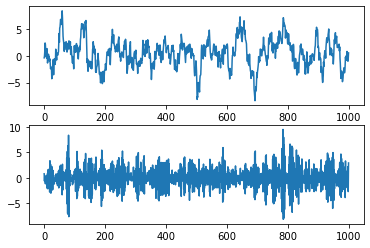

In [7]:
# import the module for simulating data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess

# Plot 1: AR parameter = +0.9
plt.subplot(2,1,1)
ar1 = np.array([1, -0.9])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = AR_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)

# Plot 2: AR parameter = -0.9
plt.subplot(2,1,2)
ar2 = np.array([1, 0.9])
ma2 = np.array([1])
AR_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = AR_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)
plt.show()

- The two AR parameters produce very different looking time series plots, but in the next exercise you'll really be able to distinguish the time series.



#### `02: Compare the ACF for Several AR Time Series`
The autocorrelation function decays exponentially for an AR time series at a rate of the AR parameter. For example, if the AR parameter, Phi = +0.9, the first-lag autocorrelation will be 0.9, the second-lag will be 0.9^2 = 0.81, the third-lag will be 0.9^3=0.729 
, etc. A smaller AR parameter will have a steeper decay, and for a negative AR parameter, say -0.9, the decay will flip signs, so the first-lag autocorrelation will be -0.9, the second-lag will be (-0.9)^2 = 0.81, the third-lag will be (-0.9)^3=-0.729
, etc.

The object `simulated_data_1` is the simulated time series with an AR parameter of +0.9, `simulated_data_2` is for an AR parameter of -0.9, and `simulated_data_3` is for an AR parameter of 0.3

Compute the autocorrelation function for each of the three simulated datasets using the `plot_acf` function with 20 lags (and suppress the confidence intervals by setting `alpha=1`).



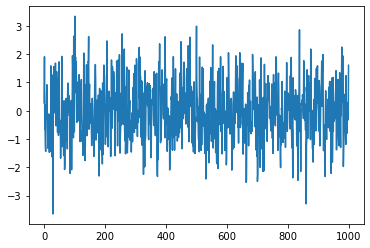

In [20]:
# Plot 3: AR parameter = 0.3
ar3 = np.array([1, -0.3])
ma3 = np.array([1])
AR_object3 = ArmaProcess(ar3, ma3)
simulated_data_3 = AR_object3.generate_sample(nsample=1000)
plt.plot(simulated_data_3)
plt.show()

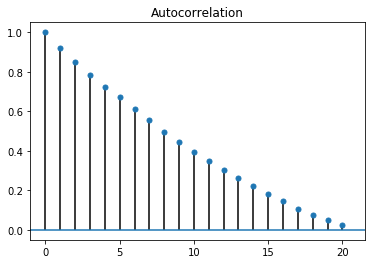

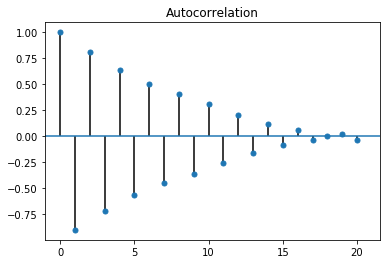

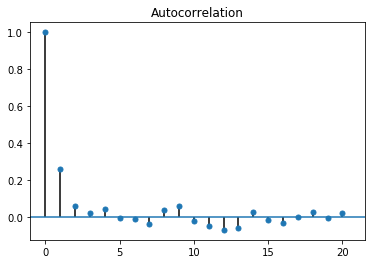

In [21]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Plot 1: AR parameter = +0.9
plot_acf(simulated_data_1, alpha=1, lags=20)
plt.show()

# Plot 2: AR parameter = -0.9
plot_acf(simulated_data_2, alpha=1, lags=20)
plt.show()

# Plot 3: AR parameter = +0.3
plot_acf(simulated_data_3, alpha=1, lags=20)
plt.show()

#### `03: Match AR Model with ACF`
Here are four Autocorrelation plots:

![Autocorelation Plots](https://s3.amazonaws.com/assets.datacamp.com/production/course_4267/datasets/MultChoice_Ch3.png)

Which figure corresponds to an AR(1) model with an AR parameter of -0.5?

`Answer: 04`

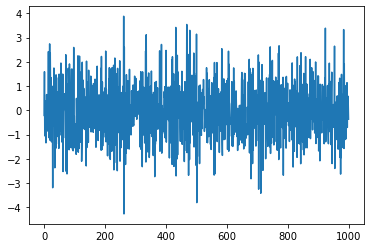

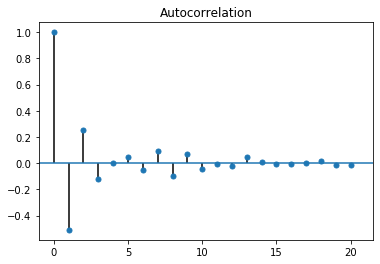

In [22]:
# Plot 4: AR parameter = -0.5
ar4 = np.array([1, 0.5])
ma4 = np.array([1])
AR_object4 = ArmaProcess(ar4, ma4)
simulated_data_4 = AR_object4.generate_sample(nsample=1000)
plt.plot(simulated_data_4)
plt.show()

# Plot 4: AR parameter = +0.3
plot_acf(simulated_data_4, alpha=1, lags=20)
plt.show()